In [1]:
from quests_data import *

from ase import Atoms
from ase.build import make_supercell
from quests.tools.plotting import savefig
from quests.tools.example import get_reference_structures
from dscribe.descriptors import SOAP

## Creating descriptors for different structures

In [2]:
fcc, bcc, hcp = get_reference_structures(supercell=2)

def describe(struct):
    soap = SOAP(species=["Cu"], r_cut=5.0, n_max=8, l_max=6)
    return soap.create(struct)

descripts = {
    "fcc": describe(fcc),
    "bcc": describe(bcc),
    "hcp": describe(hcp),
}

colors = {
    "fcc": cm.tab10(0),
    "bcc": cm.tab10(1),
    "hcp": cm.tab10(2),
}

In [3]:
descripts["fcc"].shape

(8, 252)

## Behavior under strain

In [4]:
fracs = np.arange(0.95, 1.05, 0.002).round(2)

xs = {}
for strain in fracs:
    fcc, _, _ = get_reference_structures(strain, supercell=5)
    x = describe(fcc)
    
    xs[strain] = x[0]


ref_x = xs[1.0]
distances_fcc = pd.Series({
    k - 1: np.linalg.norm(x - ref_x)
    for k, x in xs.items()
})

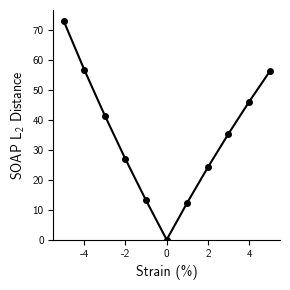

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.plot(distances_fcc.index * 100, distances_fcc.values, "ko-", markersize=4)
ax.set_ylabel("SOAP L$_2$ Distance")
ax.set_xlabel("Strain (%)")
ax.set_ylim(bottom=0)

fig.tight_layout()
# savefig(fig, "01-x-strain-soap.pdf")
plt.show()